In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [38]:
class BatsmanState(TypedDict):

    runs : int
    balls : int
    fours : int
    sixes : int

    strike_rate: float
    balls_per_boundary : float
    boundary_percentage : float

    sumamry : str

## Nodes

In [39]:
def calculate_strike_rate(state: BatsmanState):

    strike_rate = (state["runs"] / state["balls"]) * 100
    state["strike_rate"] = strike_rate

    return {"strike_rate": strike_rate}

In [40]:
def calculate_balls_per_boundary_rate(state: BatsmanState):

    balls_per_boundary = state["balls"] / (state["fours"] + state["sixes"])
    state["balls_per_boundary"] = balls_per_boundary

    return {"balls_per_boundary": balls_per_boundary}

In [41]:
def calculate_boundary_percent(state: BatsmanState):

    boundary_percentage = ((state["fours"] * 4) + (state["sixes"] * 6)) / state["runs"]
    state["boundary_percentage"] = boundary_percentage

    return {"boundary_percentage": boundary_percentage}

In [42]:
def summary(state: BatsmanState):

    summary = f"""
            Runs : {state['runs']},
            Balls : {state['balls']}
            Strike Rate : {state['strike_rate']}

            Boundries :
            Fours : {state['fours']}
            Sixes : {state['sixes']}

            Balls Per Boundary : {state['balls_per_boundary']}
            Boundary Percentage : {state['boundary_percentage']}

"""

    return {"summary": summary}

In [43]:
graph = StateGraph(BatsmanState)

# Nodes
graph.add_node(name="calculate_strike_rate", node=calculate_strike_rate)
graph.add_node(name="calculate_balls_per_boundary_rate", node=calculate_balls_per_boundary_rate)
graph.add_node(name="calculate_boundary_percent", node=calculate_boundary_percent)
graph.add_node(name="summary", node=summary)


# Edges
graph.add_edge(start_key=START, end_key="calculate_balls_per_boundary_rate")
graph.add_edge(start_key=START, end_key="calculate_strike_rate")
graph.add_edge(start_key=START, end_key="calculate_boundary_percent")

graph.add_edge(start_key="calculate_balls_per_boundary_rate", end_key="summary")
graph.add_edge(start_key="calculate_strike_rate", end_key="summary")
graph.add_edge(start_key="calculate_boundary_percent", end_key="summary")

graph.add_edge(start_key="summary", end_key=END)


# compile graph
workflow = graph.compile()

### Visual representation of graph

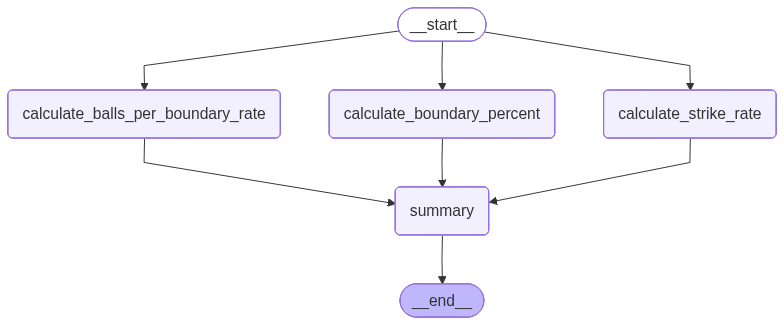

In [35]:
workflow

## Execute workflow

In [44]:
initial_state = {
    "runs": 100,
    "balls": 83,
    "fours": 7,
    "sixes": 4,
}

workflow.invoke(input=initial_state)

{'runs': 100,
 'balls': 83,
 'fours': 7,
 'sixes': 4,
 'strike_rate': 120.48192771084338,
 'balls_per_boundary': 7.545454545454546,
 'boundary_percentage': 0.52}